In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math

In [ ]:
# Load Dataset
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/OnlineRetail.xlsx"
df = pd.read_excel(file_name, sheet_name='Online Retail')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


There is negative quantities, which is abnormal order info. It is possible that those orders are from the returns. Remove those orders for the first model.

In [ ]:
df = df[df['Quantity']>0]

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

There are null values of the CustomerIDs, which should be removed

In [ ]:
df = df[df['CustomerID'].isnull()==False]

Calcualte sale revenue of each row

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Summarize the orders for each customer

In [ ]:
print(df['InvoiceDate'].min()) 
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [ ]:
# taking all of the transactions that occurred before December 01, 2011 
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [ ]:
df_orders = df.groupby(['CustomerID','InvoiceNo']).agg({'Sales':sum, 'InvoiceDate':max})
df_orders.head()

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

Create some aggregation functions to summarize the customer orders

In [ ]:
def groupby_mean(x):
  return x.mean()

def groupby_count(x):
  return x.count()

def purchase_duration(x):
  return (x.max() - x.min()).days

def avg_frequency(x):
  return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [ ]:
df_summary = df_orders.reset_index().groupby('CustomerID').agg({'Sales':[min, max, sum, groupby_mean,groupby_count], 'InvoiceDate':[min, max, purchase_duration, avg_frequency]})
df_summary

Sales            ...       InvoiceDate                   
                 min       max  ... purchase_duration purchase_frequency
CustomerID                      ...                                     
12346.0     77183.60  77183.60  ...                 0           0.000000
12347.0       382.52   1294.32  ...               327          54.500000
12348.0       227.44    892.80  ...               282          70.500000
12349.0      1757.55   1757.55  ...                 0           0.000000
12350.0       334.40    334.40  ...                 0           0.000000
...              ...       ...  ...               ...                ...
18280.0       180.60    180.60  ...                 0           0.000000
18281.0        80.82     80.82  ...                 0           0.000000
18282.0       100.21    100.21  ...                 0           0.000000
18283.0         1.95    313.65  ...               327          21.800000
18287.0        70.68   1001.32  ...               158          52.666667

[4298 rows x 9 columns]

In [ ]:
df_summary.columns = ['_'.join(x).lower() for x in df_summary.columns]
df_summary

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1.0,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1.0,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1.0,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


Data Visualization

In [ ]:
df_summary.describe()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_purchase_duration,invoicedate_purchase_frequency
count,4298.000000,4298.00000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000
mean,266.298816,613.89789,1952.818779,400.255621,4.131689,125.092369,29.437265
std,1219.631315,1747.66601,8354.913254,1271.187289,7.420253,128.908309,34.268072
min,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,95.770000,223.36000,304.305000,178.602500,1.000000,0.000000,0.000000
50%,172.175000,366.17000,657.265000,295.033958,2.000000,83.000000,20.121324
75%,310.722500,618.19250,1599.515000,431.594250,4.000000,245.000000,48.000000
max,77183.600000,77183.60000,268478.000000,77183.600000,201.000000,364.000000,182.000000


In [ ]:
df_summary.groupby('sales_count').count().iloc[:,1]

sales_count
1.0      1539
2.0       806
3.0       515
4.0       381
5.0       228
6.0       172
7.0       132
8.0        97
9.0        60
10.0       45
11.0       54
12.0       47
13.0       29
14.0       19
15.0       24
16.0       13
17.0       15
18.0       11
19.0       15
20.0       10
21.0       10
22.0        4
23.0        5
24.0        4
25.0        8
26.0        3
27.0        5
28.0        5
29.0        4
30.0        3
31.0        2
32.0        1
33.0        1
34.0        1
35.0        2
36.0        1
37.0        3
38.0        1
39.0        1
40.0        1
43.0        1
45.0        2
47.0        3
51.0        1
53.0        1
54.0        1
55.0        1
57.0        1
59.0        1
63.0        1
71.0        1
84.0        1
88.0        1
91.0        1
93.0        1
120.0       1
192.0       1
201.0       1
Name: sales_max, dtype: int64

In [ ]:
df_summary2 = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]
df_summary2.shape

(2692, 9)

In [ ]:
df_summary1 = df_summary.loc[df_summary['sales_count'] > 1]
df_summary1.shape

(2759, 9)

In [ ]:
df_summary1 = df_summary.loc[(df_summary['sales_count'] > 1) & (df_summary['invoicedate_purchase_duration'] ==0)]
df_summary1

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12365.0,320.69,320.69,641.38,320.690,2.0,2011-02-21 13:51:00,2011-02-21 14:04:00,0,0.0
12410.0,68.00,625.33,693.33,346.665,2.0,2011-02-04 10:38:00,2011-02-04 10:39:00,0,0.0
12424.0,294.64,1466.32,1760.96,880.480,2.0,2011-06-30 12:06:00,2011-06-30 12:06:00,0,0.0
12452.0,80.00,350.57,430.57,215.285,2.0,2011-11-23 08:05:00,2011-11-23 10:28:00,0,0.0
12512.0,15.70,122.33,138.03,69.015,2.0,2011-10-04 14:53:00,2011-10-04 14:55:00,0,0.0
...,...,...,...,...,...,...,...,...,...
18013.0,10.08,177.21,187.29,93.645,2.0,2011-07-07 14:08:00,2011-07-07 14:11:00,0,0.0
18024.0,52.20,337.58,389.78,194.890,2.0,2011-07-10 12:28:00,2011-07-10 12:40:00,0,0.0
18034.0,158.53,264.35,422.88,211.440,2.0,2011-11-18 12:08:00,2011-11-18 12:22:00,0,0.0


Those customers place more than 1 orders at the same time. To analyze the time between order, those records should be removed. And the customers who placed only one order should be removed.

In [ ]:
df_summary3 = df_summary[df_summary['invoicedate_purchase_duration'] > 0]
df_summary3.shape

(2692, 9)

[Text(0.5, 1.0, 'Sales Count Frequency')]

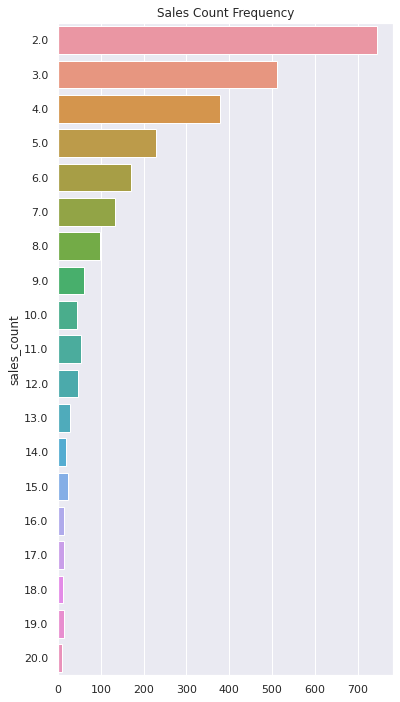

In [ ]:
s_count =  df_summary3.groupby('sales_count').count()['sales_avg'][:20]
s_count
plt.figure(figsize=(6,12))
ax = sns.barplot(y=s_count.index,x=s_count.values, orient='h')
ax.set(title='Sales Count Frequency')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'invoicedate_purchase_frequency distribution')]

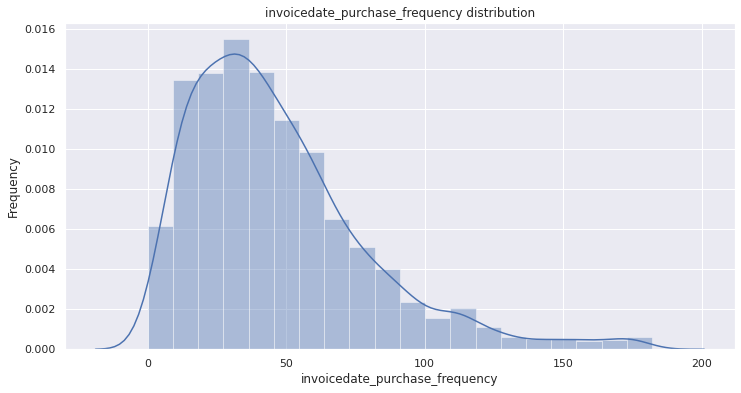

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.distplot(df_summary3['invoicedate_purchase_frequency'], bins=20) 
ax.set(title = 'invoicedate_purchase_frequency distribution', ylabel='Frequency')

# Predict 3 month customer lifetime value

In [ ]:
df_orders.head()

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

In [ ]:
# create summary statistics in 3 month intervals for sales
clv_freq = '3M'

# groupby CustomerID and invoices in 3 month intervals
df_3M = df_orders.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count]})
df_3M.columns = ['_'.join(col).lower() for col in df_3M.columns]
df_3M = df_3M.reset_index()
df_3M.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0


In [ ]:
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(df_3M.reset_index()['InvoiceDate'].unique(), reverse=True))}
date_month_map

{'2010-12-31': 'M_5',
 '2011-03-31': 'M_4',
 '2011-06-30': 'M_3',
 '2011-09-30': 'M_2',
 '2011-12-31': 'M_1'}

In [ ]:
df_3M['M'] = df_3M['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
df_3M

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600000,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790000,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390000,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385000,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910000,1.0,M_2
...,...,...,...,...,...,...
9215,18283.0,2011-06-30,524.68,131.170000,4.0,M_3
9216,18283.0,2011-09-30,278.09,92.696667,3.0,M_2
9217,18283.0,2011-12-31,766.21,153.242000,5.0,M_1
9218,18287.0,2011-06-30,765.28,765.280000,1.0,M_3


## RFM analysis of customer
- R: Recency, how recently did the customer purchase?
- F: Frequency, how frequently do the customer purchse?
- M: Monetary value, how much do they spend each time on average?

In [ ]:
df_features = pd.pivot_table(df_3M[df_3M['M']!='M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')
df_features.columns = ['_'.join(x) for x in df_features.columns]
df_features

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.250000,NaN,312.362000,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,180.600000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,180.60,NaN
18281.0,NaN,80.820,NaN,NaN,NaN,1.0,NaN,NaN,NaN,80.82,NaN,NaN
18282.0,100.210000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,100.21,NaN,NaN,NaN


In [ ]:
# Create response dataframe
df_response = df_3M.loc[df_3M['M']=='M_1', ['CustomerID', 'sales_sum']]
df_response.columns = ['CustomerID', 'CLV_'+clv_freq]
df_response

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
...,...,...
9207,18274.0,175.92
9208,18276.0,335.86
9209,18277.0,110.38
9217,18283.0,766.21


In [ ]:
df_final = df_features.reset_index().merge(df_response, left_on='CustomerID', right_on='CustomerID', how='left')
df_final = df_final.fillna(0)
df_final

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00,0.00
3612,18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00,0.00
3613,18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00,0.00
3614,18283.0,92.696667,131.170,105.966667,0.00,3.0,4.0,3.0,0.0,278.09,524.68,317.90,0.00,766.21


Now the data is well prepared.

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Our Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in df_final.columns if x not in ['CustomerID', target_var]]

# Split data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(df_final[all_features], df_final[target_var], test_size=0.3,random_state=123)

# Fit Model
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Get our y intercept
reg_fit.intercept_

68.82479078502234

In [ ]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,-0.023088
1,sales_avg_M_3,-0.263556
2,sales_avg_M_4,-0.054793
3,sales_avg_M_5,-0.137554
4,sales_count_M_2,32.367868
5,sales_count_M_3,25.383021
6,sales_count_M_4,-80.362420
7,sales_count_M_5,3.342321
8,sales_sum_M_2,0.505264
9,sales_sum_M_3,0.217211


In [ ]:
# Run our input data into our model predictors
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [ ]:
# Assess performance Training Data
from sklearn.metrics import r2_score, median_absolute_error

print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.7410379598289378
195.38010474272627


In [ ]:
# Compare R-Squared Performance on Training and Test Datasets
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.7410
Out-of-Sample R-Squared: 0.4687


In [ ]:
# Compare MSE on Training and Test Datasets
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 195.3801
Out-of-Sample MSE: 197.3949


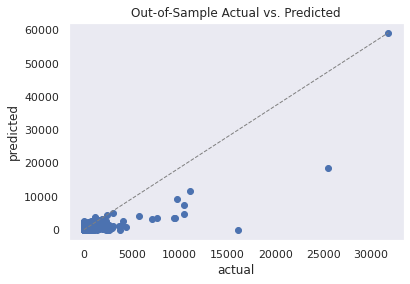

In [ ]:
# Plot the predicted vs actual values using our Test Dataset
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

## Model improvement

In [ ]:
# import sklearn.metrics as sklm
# import math
# def print_metrics(y_true, y_predicted, n_parameters):
#     # from sklearn.metrics import r2_score, median_absolute_error
#     ## First compute R^2 and the adjusted R^2
#     r2 = sklm.r2_score(y_true, y_predicted)
#     r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
#     ## Print the usual metrics and the R^2 values
#     print('Mean Square Error = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
#     print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
#     print('Mean Absolute Error = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
#     print('Median Absolute Error = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
#     print('R^2 = ' + str(r2))
#     print('Adjusted R^2 = ' + str(r2_adj))
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    from sklearn.metrics import r2_score, median_absolute_error
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error = ', sklm.mean_squared_error(y_true, y_predicted))
    print('Root Mean Square Error = ', math.sqrt(sklm.mean_squared_error(y_true, y_predicted)))
    print('Mean Absolute Error = ', sklm.mean_absolute_error(y_true, y_predicted))
    print('Median Absolute Error = ', sklm.median_absolute_error(y_true, y_predicted))
    print('R^2 = ', r2)
    print('Adjusted R^2 = ', r2_adj)

In [ ]:
# Our Target Variable
label = 'CLV_'+clv_freq
feature_cols = [x for x in df_final.columns if x not in ['CustomerID', target_var]]

X = df_final[feature_cols]
y = df_final[label]

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)
predictions = reg.predict(X_test_scaled)
print_metrics(y_test, predictions,12)

Mean Square Error =  1424360.5032002036
Root Mean Square Error =  1193.4657528392693
Mean Absolute Error =  406.7863853278103
Median Absolute Error =  197.39491604168308
R^2 =  0.46868057436460964
Adjusted R^2 =  0.4632336837010595


With scaling, the R2 is similiar to no scaling

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Create and Train model
reg = AdaBoostRegressor().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,12)

Mean Square Error =  990793.320586433
Root Mean Square Error =  995.3860158684333
Mean Absolute Error =  497.36490379253956
Median Absolute Error =  328.11702344546416
R^2 =  0.6304111656883175
Adjusted R^2 =  0.6266222773589339


In [ ]:
from sklearn import svm
reg = svm.SVR().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,12)

Mean Square Error =  2785925.731931215
Root Mean Square Error =  1669.1092630296002
Mean Absolute Error =  445.9731281510134
Median Absolute Error =  91.76024986371928
R^2 =  -0.039214760888727884
Adjusted R^2 =  -0.049868407086096016


In [ ]:
# test no scaling
label = 'CLV_'+clv_freq
feature_cols = [x for x in df_final.columns if x not in ['CustomerID', target_var]]

X = df_final[feature_cols]
y = df_final[label]

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)
print_metrics(y_test, predictions,12)

Mean Square Error =  1424360.503200211
Root Mean Square Error =  1193.4657528392725
Mean Absolute Error =  406.78638532781
Median Absolute Error =  197.39491604168268
R^2 =  0.46868057436460686
Adjusted R^2 =  0.4632336837010567


In [ ]:
r2_score(y_true=y_test, y_pred=predictions)

0.46868057436460686

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Our Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in df_final.columns if x not in ['CustomerID', target_var]]

# Split data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(df_final[all_features], df_final[target_var], test_size=0.3,random_state=123)

# Fit Model
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)
# Run our input data into our model predictors
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

print_metrics(y_test, test_preds,12)

Mean Square Error =  1424360.503200211
Root Mean Square Error =  1193.4657528392725
Mean Absolute Error =  406.78638532781
Median Absolute Error =  197.39491604168268
R^2 =  0.46868057436460686
Adjusted R^2 =  0.4632336837010567


In [ ]:
r2_score(y_test, test_preds)

0.46868057436460686

In [ ]:
# Our Target Variable
label = 'CLV_'+clv_freq
feature_cols = [x for x in df_final.columns if x not in ['CustomerID', target_var]]

X = df_final[feature_cols]
y = df_final[label]

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train, y_train)
predictions = reg.predict(X_test)
print_metrics(y_test, predictions,12)

Mean Square Error =  1.1079925469626218e+33
Root Mean Square Error =  3.3286522001594308e+16
Mean Absolute Error =  1.5730297722302082e+16
Median Absolute Error =  7728957020680618.0
R^2 =  -4.133068575952559e+26
Adjusted R^2 =  -4.175439269648252e+26


In [ ]:
# Our Target Variable
label = 'CLV_'+clv_freq
feature_cols = [x for x in df_final.columns if x not in ['CustomerID', target_var]]

X = df_final[feature_cols]
y = df_final[label]

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
predictions = reg.predict(X_test)
print_metrics(y_test, predictions,12)

Mean Square Error =  985714.4600326228
Root Mean Square Error =  992.8315365824269
Mean Absolute Error =  394.0774543778802
Median Absolute Error =  195.796
R^2 =  0.6323056981934451
Adjusted R^2 =  0.6285362319121104


In [ ]:
def reg_metrics(model_name, y_true, y_predicted, n_parameters):
  r2 = sklm.r2_score(y_true, y_predicted)
  r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
  mse = sklm.mean_squared_error(y_true, y_predicted)
  rmse = math.sqrt(sklm.mean_squared_error(y_true, y_predicted))
  mae = sklm.mean_absolute_error(y_true, y_predicted)
  med_mae = sklm.median_absolute_error(y_true, y_predicted)
  return [model_name, mse, rmse, mae, med_mae, r2, r2_adj ]
  # result = pd.DataFrame(columns = ['model', 'MSE', 'RMSE', 'MAE', 'Median Absolute Error', 'R^2', 'R^2 Adj'])

In [ ]:
reg_metrics('KNN_5',y_test, predictions,12)

['KNN_5',
 985714.4600326228,
 992.8315365824269,
 394.0774543778802,
 195.796,
 0.6323056981934451,
 0.6285362319121104]

In [ ]:
result = []
n = np.arange(1,30)
for i in n:
  reg = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
  predictions = reg.predict(X_test)
  m = reg_metrics('KNN_' +str(i), y_test, predictions,12)
  result.append(m)

# result
df_metrics = pd.DataFrame(data = result, columns =['model', 'MSE', 'RMSE', 'MAE', 'Median Absolute Error', 'R^2', 'R^2 Adj'])
df_metrics 

,model,MSE,RMSE,MAE,Median Absolute Error,R^2,R^2 Adj
0,KNN_1,1.477898e+06,1215.688244,455.517788,194.210000,0.448710,0.443058
1,KNN_2,1.381723e+06,1175.467264,436.887465,206.720000,0.484585,0.479301
2,KNN_3,1.197758e+06,1094.421512,422.661816,199.743333,0.553208,0.548628
3,KNN_4,1.082436e+06,1040.401606,408.379412,196.590000,0.596227,0.592087
4,KNN_5,9.857145e+05,992.831537,394.077454,195.796000,0.632306,0.628536
5,KNN_6,8.726182e+05,934.140348,384.041916,193.528333,0.674493,0.671156
6,KNN_7,8.528733e+05,923.511385,374.431785,185.991429,0.681859,0.678597
7,KNN_8,8.701640e+05,932.825825,379.256550,187.371250,0.675409,0.672081
8,KNN_9,8.530522e+05,923.608254,373.018556,184.693333,0.681792,0.678530
9,KNN_10,8.900879e+05,943.444703,371.098747,183.570000,0.667977,0.664573


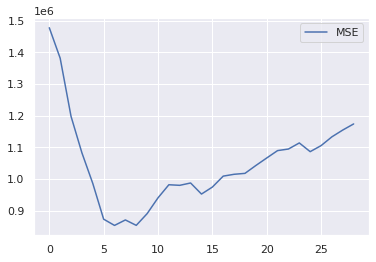

In [ ]:
df_metrics[['MSE']].plot()

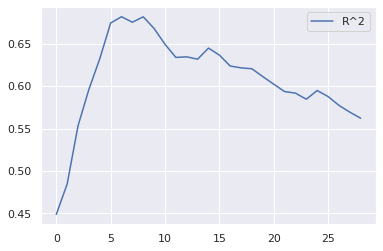

In [ ]:
df_metrics[['R^2']].plot()


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
reg = GaussianProcessRegressor(kernel=kernel,random_state=123).fit(X_train, y_train)
predictions = reg.predict(X_test)
result = reg_metrics('GPR',y_test, predictions,12)
metrics = pd.DataFrame(data = result, index = ['model', 'MSE', 'RMSE', 'MAE', 'Median Absolute Error', 'R^2', 'R^2 Adj'])
metrics
# result=[]
# result = reg_metrics('GPR',y_test, predictions,12)
# result = pd.DataFrame(columns = ['model', 'MSE', 'RMSE', 'MAE', 'Median Absolute Error', 'R^2', 'R^2 Adj'])

,0
model,GPR
MSE,1.47466e+06
RMSE,1214.36
MAE,396.971
Median Absolute Error,176.545
R^2,0.449918
R^2 Adj,0.444279


In [ ]:
from sklearn import tree
# kernel = DotProduct() + WhiteKernel()
reg = tree.DecisionTreeRegressor().fit(X_train, y_train)
predictions = reg.predict(X_test)
result = reg_metrics('GPR',y_test, predictions,12)
metrics = pd.DataFrame(data = result, index = ['model', 'MSE', 'RMSE', 'MAE', 'Median Absolute Error', 'R^2', 'R^2 Adj'])
metrics


,0
model,GPR
MSE,1.79903e+06
RMSE,1341.28
MAE,507.858
Median Absolute Error,222.63
R^2,0.328921
R^2 Adj,0.322041


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# kernel = DotProduct() + WhiteKernel()
reg = AdaBoostRegressor(random_state=123, n_estimators=30).fit(X_train, y_train)
predictions = reg.predict(X_test)
result = reg_metrics('GPR',y_test, predictions,12)
metrics = pd.DataFrame(data = result, index = ['model', 'MSE', 'RMSE', 'MAE', 'Median Absolute Error', 'R^2', 'R^2 Adj'])
metrics


,0
model,GPR
MSE,1.06308e+06
RMSE,1031.06
MAE,560.791
Median Absolute Error,339.021
R^2,0.603445
R^2 Adj,0.59938


In [ ]:
result = []
n=np.arange(1,50)
for i in n:
  reg = AdaBoostRegressor(random_state=123, n_estimators=i).fit(X_train, y_train)
  predictions = reg.predict(X_test)
  m = reg_metrics('AdaBoost_' +str(i), y_test, predictions,12)
  result.append(m)

df_metrics = pd.DataFrame(data = result, columns =['model', 'MSE', 'RMSE', 'MAE', 'Median Absolute Error', 'R^2', 'R^2 Adj'])
df_metrics

,model,MSE,RMSE,MAE,Median Absolute Error,R^2,R^2 Adj
0,AdaBoost_1,2.177015e+06,1475.471170,440.401775,212.091070,0.187923,0.179598
1,AdaBoost_2,2.177015e+06,1475.471170,440.401775,212.091070,0.187923,0.179598
2,AdaBoost_3,1.281969e+06,1132.240856,419.007052,212.091070,0.521796,0.516893
3,AdaBoost_4,1.281969e+06,1132.240856,419.007052,212.091070,0.521796,0.516893
4,AdaBoost_5,1.244229e+06,1115.450176,456.207928,287.537415,0.535874,0.531116
5,AdaBoost_6,9.399720e+05,969.521525,425.411354,287.537415,0.649369,0.645774
6,AdaBoost_7,1.210121e+06,1100.055052,438.143410,287.537415,0.548597,0.543969
7,AdaBoost_8,1.162471e+06,1078.179436,429.376296,287.537415,0.566371,0.561926
8,AdaBoost_9,1.161500e+06,1077.728949,434.938686,296.011997,0.566734,0.562292
9,AdaBoost_10,1.257679e+06,1121.463043,445.532544,296.011997,0.530856,0.526047


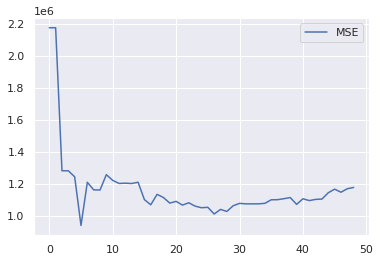

In [ ]:
df_metrics[['MSE']].plot()

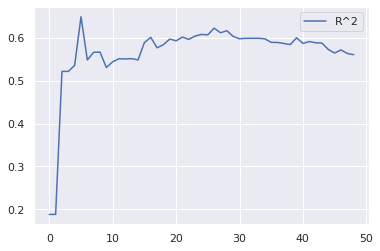

In [ ]:
df_metrics[['R^2']].plot()


In [ ]:
result = []
n=np.arange(1,20)
from sklearn.ensemble import RandomForestRegressor
for i in n:
  reg = RandomForestRegressor(max_depth=i, random_state=123).fit(X_train, y_train)
  predictions = reg.predict(X_test)
  m = reg_metrics('RF_' +str(i), y_test, predictions,12)
  result.append(m)

df_metrics = pd.DataFrame(data = result, columns =['model', 'MSE', 'RMSE', 'MAE', 'Median Absolute Error', 'R^2', 'R^2 Adj'])
df_metrics

,model,MSE,RMSE,MAE,Median Absolute Error,R^2,R^2 Adj
0,RF_1,991176.866439,995.578659,498.322326,417.048057,0.630268,0.626478
1,RF_2,841915.027100,917.559277,437.654526,331.130385,0.685946,0.682727
2,RF_3,725827.975652,851.955384,402.147043,252.791474,0.729249,0.726474
3,RF_4,709546.679378,842.345938,385.933457,180.180143,0.735323,0.732609
4,RF_5,686793.337212,828.729954,373.496077,165.545324,0.743810,0.741184
5,RF_6,703081.798345,838.499731,372.298051,163.732851,0.737734,0.735046
6,RF_7,702109.975262,837.920029,369.683223,170.681300,0.738097,0.735412
7,RF_8,706986.159881,840.824690,368.896116,175.058529,0.736278,0.733574
8,RF_9,688024.088563,829.472175,364.627449,174.980622,0.743351,0.740720
9,RF_10,701419.218371,837.507742,367.339157,182.925421,0.738354,0.735672


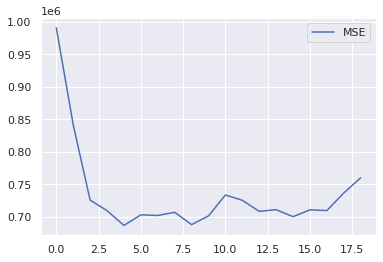

In [ ]:
df_metrics[['MSE']].plot()


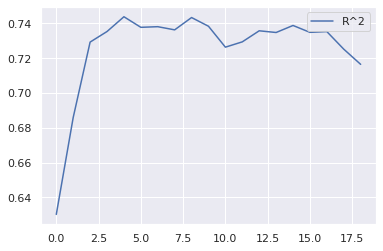

In [ ]:
df_metrics[['R^2']].plot()


In [ ]:
result = []
n=np.arange(1,50)
from sklearn.ensemble import GradientBoostingRegressor
for i in n:
  reg = reg1 = GradientBoostingRegressor(random_state=1, n_estimators=i).fit(X_train, y_train)
  predictions = reg.predict(X_test)
  m = reg_metrics('GradientBoosting_' +str(i), y_test, predictions,12)
  result.append(m)

df_metrics = pd.DataFrame(data = result, columns =['model', 'MSE', 'RMSE', 'MAE', 'Median Absolute Error', 'R^2', 'R^2 Adj'])
df_metrics

,model,MSE,RMSE,MAE,Median Absolute Error,R^2,R^2 Adj
0,GradientBoosting_1,2.188084e+06,1479.217257,593.804661,508.076114,0.183794,0.175427
1,GradientBoosting_2,2.029137e+06,1424.477760,570.725987,484.283457,0.243085,0.235325
2,GradientBoosting_3,1.896475e+06,1377.125693,553.178073,464.793926,0.292571,0.285319
3,GradientBoosting_4,1.644266e+06,1282.289259,530.654612,438.848636,0.386651,0.380363
4,GradientBoosting_5,1.556976e+06,1247.788380,517.699250,423.139135,0.419212,0.413258
5,GradientBoosting_6,1.463777e+06,1209.866466,504.272547,406.717263,0.453977,0.448380
6,GradientBoosting_7,1.384415e+06,1176.611451,490.773239,385.835222,0.483581,0.478287
7,GradientBoosting_8,1.330491e+06,1153.468977,479.796788,370.986565,0.503696,0.498608
8,GradientBoosting_9,1.232429e+06,1110.148274,468.837393,359.154470,0.540275,0.535562
9,GradientBoosting_10,1.171054e+06,1082.152665,458.383545,342.622203,0.563170,0.558691


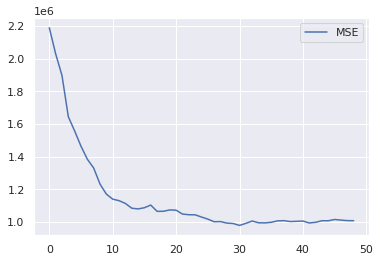

In [ ]:
df_metrics[['MSE']].plot()


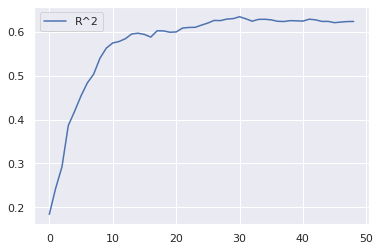

In [ ]:
df_metrics[['R^2']].plot()
